## Production de bilans comptables à partir des données extraites de la burette

Bibliothèques

In [1]:
#Bibliothèques nécessaires
import pandas as pd
import os
%matplotlib inline

## Définition des variables et des fonctions

In [2]:
# Les lignes budgétaires servant à faire les calculs
cat = {'Caisse principale': 531100,
 'Chèques à encaisser': 511200,
 'Clients - Ventes de biens ou de prestations de services': 411100,
 'Cotisations': 756000,
 'Divers': 708810,
 'Dons Manuels non affectés': 758100,
 'Erreur de caisse négative': 658001,
 'Erreur de caisse positive': 758001,
 'Helloasso': 510001,
 'Marquage': 706100,
 'Pièces neuves': 707300,
 'Vente antivols': 707200,
 'Vente de vélos': 707100,
 'Ventes de dons en nature': 758700,
 'Caisse principale':531100,
 'Coup de pouce':511500,
 'Virements internes de liquide': 580000}

#Pour les données et pour le compte mentionné, renvoie le bilan Crédit-Débit
def obtenir_total_compte(mois,compte,detail=False):
    t = mois[mois["Compte/Code"]==compte][["Date","Débit","Crédit"]]
    if detail:
        return t
    else:
        return t["Crédit"].sum()-t["Débit"].sum()

#Résumé général du mois avec production des fichiers
def get_resume_mois(mois,nom_du_mois=""):
    total = []
    
    #Totaux pour les différentes lignes
    total.append(["Total cotisation",obtenir_total_compte(mois,756000)])
    total.append(["Vente de vélo",obtenir_total_compte(mois,707100)])
    total.append(["Antivols",obtenir_total_compte(mois,707200)])
    total.append(["Pièce neuves",obtenir_total_compte(mois,707300)])
    total.append(["Pièce d'occasion",obtenir_total_compte(mois,758700)])
    total.append(["Gravage",obtenir_total_compte(mois,706100)])
    total.append(["Dons",obtenir_total_compte(mois,758100)])
    total.append(["Autres produits",obtenir_total_compte(mois,708810)])
    total.append(["Helloasso",obtenir_total_compte(mois,510001)])
    total.append(["Total prestation permanence",obtenir_total_compte(mois,411100)])    
    total.append(["Total chèque",obtenir_total_compte(mois,511200)])
    total.append(["Total coup de pouce",obtenir_total_compte(mois,511500)])
    total.append(["Total retraits de caisse",obtenir_total_compte(mois,580000)])
    total.append(["Total entrée (liquide/chèque/coupdepouce)",0])
    total.append(["Total argent liquide en caisse",obtenir_total_compte(mois,531100)])

    #Extrait à part des mouvements de la caisse 58000 dans un fichier résumés/Mouvements pour vérification
    obtenir_total_compte(mois,580000,detail=True).sort_values("Débit").drop("Crédit",axis=1).round(1).to_excel("résumés/Mouvements 580000 "+nom_du_mois+".xls")
    
    #Mise en forme du tableau final
    t = pd.DataFrame(total,columns=["Colonne","Total"]).set_index("Colonne")
    
    #Ajout de deux lignes supplémentaires
    t.loc["Total entrée (liquide/chèque/coupdepouce)"]["Total"] = t.iloc[0:10]["Total"].sum()
    
    #Écrire dans un fichier
    t.round(1).to_excel("résumés/Résumé mois {}.xls".format(nom_du_mois))
    
    return t.round(1)

## Script détaillé

La première étape est d'extraire les données de la burette > comptabilité > écriture comptables > afficher les 2000 premiers résultats, sélectionner, puis Autres options > extraire > "Tous types de données" et export-python2 pour sélectionner les variables pré-sélectionnées.

Mettre le fichier CSV dans le dossier correspondant

Charger les données contenues dans le dossier data-burette-2021


In [3]:
data = pd.concat([pd.read_csv("./data-burette-2021/"+i) for i in os.listdir("./data-burette-2021/") if "csv" in i])

Sélection des données d'un mois particulier

In [17]:
mois = data[(data["Date"]>="2021-05-01") & (data["Date"]<="2021-05-31")]
len(mois)

543

Application du script pour le mois

In [18]:
get_resume_mois(mois,"mai")

,Total
Colonne,
Total cotisation,907.0
Vente de vélo,430.0
Antivols,91.0
Pièce neuves,507.4
Pièce d'occasion,227.1
Gravage,0.0
Dons,21.0
Autres produits,0.0
Helloasso,-135.0


## Analyses complémentaires

Par exemple analyser les évolutions sur une période

In [ ]:
# Sélection d'une partie des données
data = data[(data["Date"]>="2021-01-01")]

# Mise sous forme de série temporelle
data["Date-index"] = pd.to_datetime(data["Date"])
data = data.set_index("Date-index")
data["num"] = 1

### Suivi des problèmes de caisse sur l'année

Pour voir s'il y a des différentiels trop importants et réguliers ...

Erreurs de caisses négative lors de la fermeture

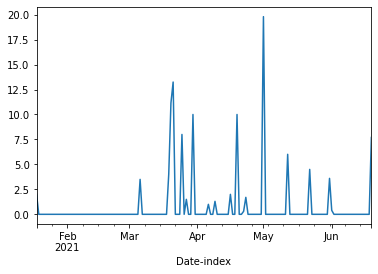

In [21]:
data[data["Compte/Code"]==658001]["Débit"].resample("d").sum().plot()

Erreurs de caisse positives lors de l'ouverture

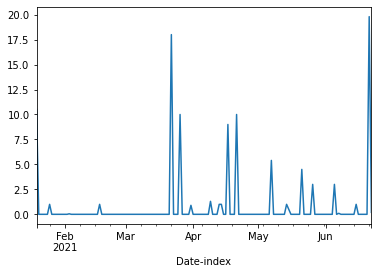

In [22]:
data[data["Compte/Code"]==758001]["Crédit"].resample("d").sum().plot()

Erreur de caisse positive